### For comparing cameras
Using blinking movies.  
Note : The old camera uses a 14-bit ADC, and the new camera uses a 16-bit ADC, so normalized contrast is more appropriate for comparison.

In [35]:
import os
import numpy
import glob
import matplotlib.pyplot as plt

import storm_analysis.sa_library.datareader as datareader

# Change directory
os.chdir("D:/gayatri-folder/1_image_quality/cameras")
# resolution = 16
img_name = 'contrast_std'
title = 'Comparing cameras (old and new)'

In [36]:
def findContrast(image, resolution):
    counts = 2**resolution
    bins = numpy.arange(0, counts+1, 1)
    histogram, bin_edges = numpy.histogram(image, bins=bins)
    tail = numpy.max(numpy.nonzero(histogram))/(counts-1)
    total = numpy.sum(histogram) # No. of pixels
    histogram = histogram/total
    x = numpy.arange(0, counts, 1)
    x = x/(counts-1)
    histogram.shape = (counts,1)
    y = x.dot(histogram)
    x_m = (x - y)*(counts-1)
    z = x - y
    variance = (numpy.power(z, 2)).dot(histogram)
    [std] = numpy.power(variance, 0.5)
    sigma = numpy.around(y+std)
    [ts] = tail-sigma
    return std,ts

def showImageHist(image) :
    counts = 2**resolution
    bins = numpy.arange(0, counts+1, 10)
    plt.figure(figsize = (8,8))
    d1 = plt.hist(image.ravel(), bins=bins, alpha=0.5, density= True)
    plt.xlim([400, 1000])
    # plt.ylim([0, 0.0025])
    plt.title('Image Histogram')
    plt.ylabel('Fraction of occurences')
    plt.xlabel('Intensities')
    plt.savefig('img_hist_gain65.png')
    plt.show()

def showContrast(d) :
    max_lim = max(i for v in d.values() for i in v)
    min_lim = min(i for v in d.values() for i in v)
    bins = numpy.arange(min_lim, max_lim, 0.000005) # fixed bin size
    plt.figure(figsize = (20,8))
    for k in d:
        plt.hist(d[k], bins=bins, alpha=0.5, label = k, edgecolor='grey', linewidth=0.8)
    # plt.xlim([0, 2500])
    # plt.ylim([0, 35000])
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('Contrast')
    plt.legend()
    plt.savefig(img_name)
    plt.show()

In [37]:
movies = sorted(glob.glob('*.tif'))
d = {}
for file in movies :
    movie_name = file.rsplit('.tif',1)[0][:-2] #Edit this!!
    if movie_name in d:
        pass
    else:
        d.update( {movie_name : []} )
    if 'old' in movie_name:
        res = 14
    else :
        res = 16
    for frame in range(0,1000) :
        image = datareader.TifReader(file).loadAFrame(frame).astype(numpy.float64)
        std,ts = findContrast(image, resolution = res)
        d[movie_name].append(std)

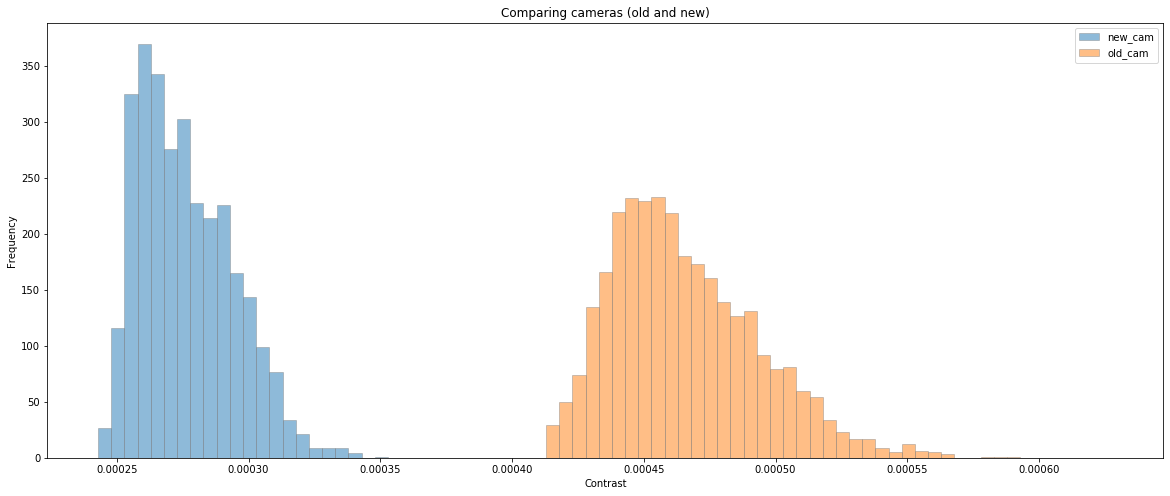

In [38]:
showContrast(d)

In [39]:
# def sepContrast(d) :
#     max_lim = max(i for v in d.values() for i in v) + 1
#     min_lim = min(i for v in d.values() for i in v) - 1
#     bins = numpy.arange(min_lim, max_lim, 0.1) # fixed bin size
#     plt.figure(figsize = (20,8))
#     # for k in d:
#     plt.hist([d['EM Gain 65'], d['EM Gain 80'], d['uxapo']], bins=bins, alpha=0.7, label = ['usapo', 'uapon', 'uxapo'], edgecolor='grey', linewidth=0.8)
#     plt.xlim([6.9, 11])
#     # plt.ylim([0, 450])
#     plt.title(title)
#     plt.ylabel('No. of occurences')
#     plt.xlabel('Contrast')
#     plt.legend()
#     plt.savefig(img_name)
#     plt.show()

In [40]:
# sepContrast(d1)